In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
import os

In [2]:
sns.set(style="whitegrid")

## Load data

In [3]:
notebook_path = os.path.abspath("EDA.ipynb")

In [4]:
project_dir = Path(notebook_path).resolve().parents[1]
raw_data_dir = "{}/{}".format(project_dir, "data/raw")
processed_data_dir = "{}/{}".format(project_dir, "data/processed")
model_dir = "{}/{}".format(project_dir, "models")

In [5]:
dataset_filepath = "{}/{}".format(raw_data_dir, "cs-training.csv")

In [6]:
df_dataset = pd.read_csv(dataset_filepath, index_col=0)

In [7]:
columns = df_dataset.columns.tolist()
target_column = "SeriousDlqin2yrs"
feature_columns = [column for column in columns if column != target_column]

In [8]:
target_column

'SeriousDlqin2yrs'

In [9]:
feature_columns

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

## Preview dataset

In [10]:
df_dataset

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [11]:
df_dataset.groupby(target_column)

In [12]:
df_count = df_dataset.groupby(target_column).count().iloc[:,0:1]
df_count.columns = ["count"]
df_count.reset_index(inplace=True)

## Proportion for each class

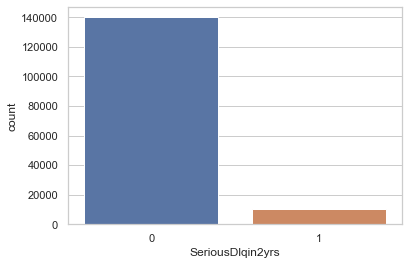

In [13]:
ax = sns.barplot(x="SeriousDlqin2yrs", y="count", data=df_count)

## Look at feature distribution

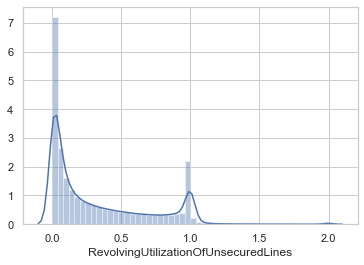

In [14]:
sns.distplot(df_dataset["RevolvingUtilizationOfUnsecuredLines"].clip(upper=2))

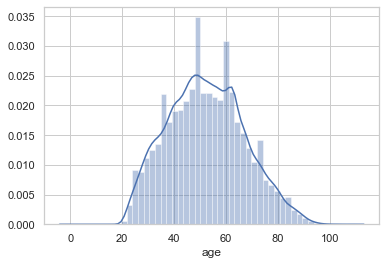

In [15]:
sns.distplot(df_dataset["age"])

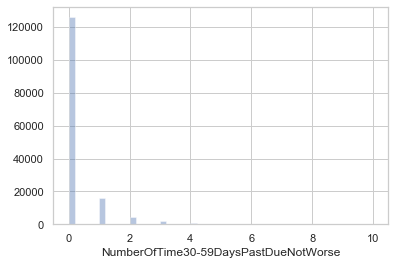

In [16]:
sns.distplot(df_dataset["NumberOfTime30-59DaysPastDueNotWorse"].clip(upper=10), kde=False)

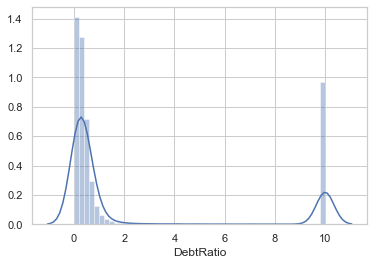

In [17]:
sns.distplot(df_dataset["DebtRatio"].clip(upper=10))

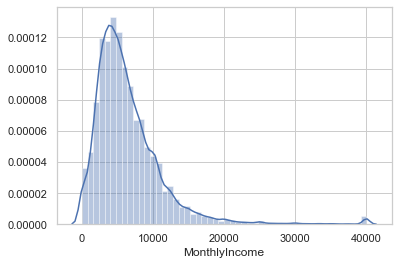

In [18]:
sns.distplot(df_dataset["MonthlyIncome"].clip(upper=40000))

In [ ]:
sns.distplot(df_dataset["NumberOfOpenCreditLinesAndLoans"])

In [ ]:
sns.distplot(df_dataset["NumberOfTimes90DaysLate"].clip(upper=6), kde=False)

In [ ]:
sns.distplot(df_dataset["NumberOfTime60-89DaysPastDueNotWorse"].clip(upper=3), kde=False)

In [ ]:
sns.distplot(df_dataset["NumberOfDependents"].clip(upper=10), kde=False)

## Look at class/features correlation

In [ ]:
corr = df_dataset.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True)